<a href="https://colab.research.google.com/github/ishtrain07/ab-experimentation/blob/main/AB_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries that are needed

import numpy as np
import pandas as pd


In [13]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of users
n_users = 10000

# Simulate user data
user_ids = np.arange(1, n_users + 1)
variants = np.random.choice(['A', 'B'], size=n_users, p=[0.5, 0.5])
time_on_page = np.random.normal(45, 10, n_users).clip(15, 100)  # in seconds
clicks = np.random.binomial(1, p=[0.10 if variant == 'A' else 0.12 for variant in variants])
purchases = np.random.binomial(1, p=[0.02 if variant == 'A' else 0.03 for variant in variants])

# Create DataFrame
data = pd.DataFrame({
    'user_id': user_ids,
    'variant': variants,
    'time_on_page': time_on_page,
    'click': clicks,
    'purchase': purchases
})

# Display the first few rows
data.head()


,user_id,variant,time_on_page,click,purchase
0,1,A,30.121383,0,0
1,2,B,33.748139,0,0
2,3,B,48.888189,0,0
3,4,B,33.261267,0,0
4,5,A,56.126343,0,0


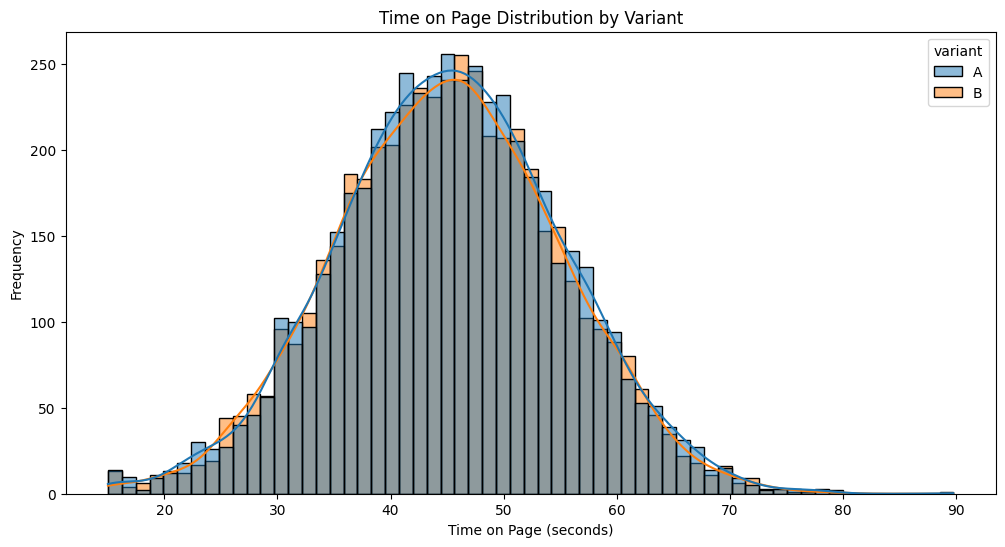

Conversion Rates by Variant:
variant
A    0.019110
B    0.031275
Name: purchase, dtype: float64
Click Rates by Variant:
variant
A    0.094760
B    0.120431
Name: click, dtype: float64


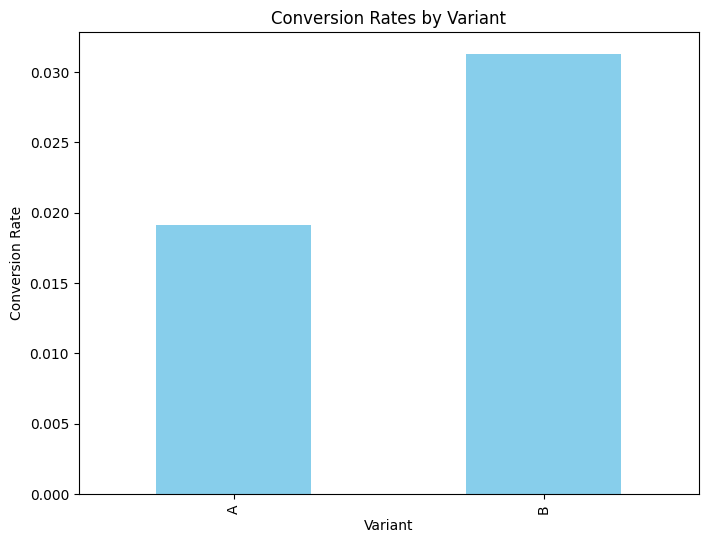

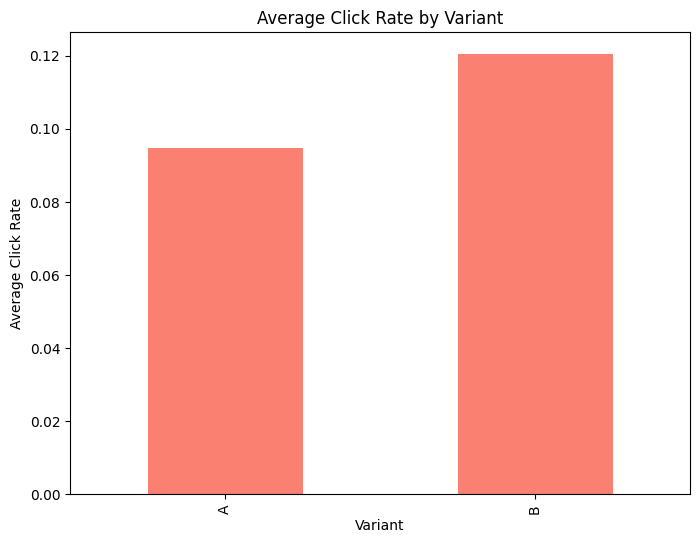

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(data):
    # Plot distribution of time on page by variant
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x='time_on_page', hue='variant', kde=True)
    plt.title('Time on Page Distribution by Variant')
    plt.xlabel('Time on Page (seconds)')
    plt.ylabel('Frequency')
    plt.show()

    # Calculate conversion rates and average click rates
    conversion_rates = data.groupby('variant')['purchase'].mean()
    click_rates = data.groupby('variant')['click'].mean()

    # Print conversion rates
    print("Conversion Rates by Variant:")
    print(conversion_rates)

    #Print click rates

    print ("Click Rates by Variant:")
    print(click_rates)

    # Plot conversion rates by variant
    plt.figure(figsize=(8, 6))
    conversion_rates.plot(kind='bar', color='skyblue')
    plt.title('Conversion Rates by Variant')
    plt.xlabel('Variant')
    plt.ylabel('Conversion Rate')
    plt.show()

    # Plot average click rate by variant
    plt.figure(figsize=(8, 6))
    click_rates.plot(kind='bar', color='salmon')
    plt.title('Average Click Rate by Variant')
    plt.xlabel('Variant')
    plt.ylabel('Average Click Rate')
    plt.show()

# Call the function with your data
plot_data(data)


In [28]:
import numpy as np
from scipy import stats

def perform_ab_test_analysis(data, variant_A='A', variant_B='B', alpha=0.05):
    # Calculate the observed conversion rates
    conv_A = data[data['variant'] == variant_A]['purchase'].mean()
    conv_B = data[data['variant'] == variant_B]['purchase'].mean()

    # Calculate the number of users in each group
    n_A = data[data['variant'] == variant_A].shape[0]
    n_B = data[data['variant'] == variant_B].shape[0]

    # Calculate the standard errors
    se_A = np.sqrt(conv_A * (1 - conv_A) / n_A)
    se_B = np.sqrt(conv_B * (1 - conv_B) / n_B)

    # Calculate the z-score
    z = (conv_B - conv_A) / np.sqrt(se_A**2 + se_B**2)

    # Calculate the p-value
    p_value = stats.norm.sf(abs(z)) * 2  # Two-tailed test

    # Print results
    print(f"Conversion Rate {variant_A}: {conv_A:.4f}")
    print(f"Conversion Rate {variant_B}: {conv_B:.4f}")
    print(f"Z-Score: {z:.4f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpret the results
    if p_value < alpha:
        print(f"Reject the null hypothesis. There is a significant difference between the two variants.")
    else:
        print(f"Fail to reject the null hypothesis. No significant difference between the two variants.")

# Call the function with your dataset
perform_ab_test_analysis(data)


Conversion Rate A: 0.0191
Conversion Rate B: 0.0313
Z-Score: 3.8772
P-Value: 0.0001
Reject the null hypothesis. There is a significant difference between the two variants.


In summary statistical testing proces that there is a Significant difference between the 2 variants, and can be used to better drive and understand website traffic & metrics
